In [5]:
import streamlit as st
import pandas as pd
from functools import reduce
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
st.title('Gapminder Dashboard')

2021-05-04 15:15:33.327 WARNING root: 
  command:

    streamlit run /Users/vahe_shelunts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [7]:
gni_data = pd.read_csv('/Users/vahe_shelunts/Desktop/HWR Winter 2020:2021/Enterprise architectures/gapminder_dashboard/gnipercapita_ppp.csv').set_index('country')
life_exp_data = pd.read_csv('/Users/vahe_shelunts/Desktop/HWR Winter 2020:2021/Enterprise architectures/gapminder_dashboard/life_expectancy_years.csv').set_index('country')
pop_data = pd.read_csv('/Users/vahe_shelunts/Desktop/HWR Winter 2020:2021/Enterprise architectures/gapminder_dashboard/population_total.csv').set_index('country')

In [8]:
#backward filling and then forward filling on column values
gni_data.bfill(axis=1, inplace=True) 
gni_data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,...,1710.0,1700.0,1920.0,2020.0,2070.0,2110.0,2150.0,2230.0,2260.0,2330.0
Albania,2550.0,1880.0,1740.0,2110.0,2300.0,2710.0,3050.0,2780.0,3110.0,3550.0,...,9540.0,10200.0,10500.0,10800.0,11400.0,11800.0,12200.0,13100.0,13800.0,14400.0
Algeria,6660.0,6510.0,6690.0,6630.0,6530.0,6710.0,6980.0,7120.0,7490.0,7690.0,...,13100.0,13400.0,13100.0,12800.0,12700.0,11700.0,11500.0,11400.0,11500.0,11500.0
Angola,2980.0,3300.0,1620.0,1490.0,1260.0,2340.0,2410.0,2820.0,2810.0,2630.0,...,5950.0,6130.0,6810.0,7130.0,7680.0,6960.0,6730.0,6860.0,6550.0,6390.0
Antigua and Barbuda,10500.0,11300.0,11600.0,12400.0,13200.0,12600.0,13500.0,14300.0,14900.0,15300.0,...,20100.0,19700.0,19000.0,18200.0,18100.0,17900.0,18400.0,18900.0,20500.0,21500.0


In [9]:
gni_data.ffill(axis=1, inplace=True)
gni_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    186 non-null    float64
 1   1991    186 non-null    float64
 2   1992    186 non-null    float64
 3   1993    186 non-null    float64
 4   1994    186 non-null    float64
 5   1995    186 non-null    float64
 6   1996    186 non-null    float64
 7   1997    186 non-null    float64
 8   1998    186 non-null    float64
 9   1999    186 non-null    float64
 10  2000    186 non-null    float64
 11  2001    186 non-null    float64
 12  2002    186 non-null    float64
 13  2003    186 non-null    float64
 14  2004    186 non-null    float64
 15  2005    186 non-null    float64
 16  2006    186 non-null    float64
 17  2007    186 non-null    float64
 18  2008    186 non-null    float64
 19  2009    186 non-null    float64
 20  2010    186 non-null    float64
 21  2011    186 non-null    float

In [10]:
life_exp_data.bfill(axis=1, inplace=True)
life_exp_data.ffill(axis=1, inplace=True)
life_exp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Columns: 301 entries, 1800 to 2100
dtypes: float64(301)
memory usage: 441.2+ KB


In [11]:
pop_data.bfill(axis=1, inplace=True)
pop_data.ffill(axis=1, inplace=True)
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Columns: 301 entries, 1800 to 2100
dtypes: int64(301)
memory usage: 460.1+ KB


In [12]:
pop_data.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,416000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,2580000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000


In [13]:
gni_data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,...,1710.0,1700.0,1920.0,2020.0,2070.0,2110.0,2150.0,2230.0,2260.0,2330.0
Albania,2550.0,1880.0,1740.0,2110.0,2300.0,2710.0,3050.0,2780.0,3110.0,3550.0,...,9540.0,10200.0,10500.0,10800.0,11400.0,11800.0,12200.0,13100.0,13800.0,14400.0
Algeria,6660.0,6510.0,6690.0,6630.0,6530.0,6710.0,6980.0,7120.0,7490.0,7690.0,...,13100.0,13400.0,13100.0,12800.0,12700.0,11700.0,11500.0,11400.0,11500.0,11500.0
Angola,2980.0,3300.0,1620.0,1490.0,1260.0,2340.0,2410.0,2820.0,2810.0,2630.0,...,5950.0,6130.0,6810.0,7130.0,7680.0,6960.0,6730.0,6860.0,6550.0,6390.0
Antigua and Barbuda,10500.0,11300.0,11600.0,12400.0,13200.0,12600.0,13500.0,14300.0,14900.0,15300.0,...,20100.0,19700.0,19000.0,18200.0,18100.0,17900.0,18400.0,18900.0,20500.0,21500.0


In [14]:
gni_data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,...,1710.0,1700.0,1920.0,2020.0,2070.0,2110.0,2150.0,2230.0,2260.0,2330.0
Albania,2550.0,1880.0,1740.0,2110.0,2300.0,2710.0,3050.0,2780.0,3110.0,3550.0,...,9540.0,10200.0,10500.0,10800.0,11400.0,11800.0,12200.0,13100.0,13800.0,14400.0
Algeria,6660.0,6510.0,6690.0,6630.0,6530.0,6710.0,6980.0,7120.0,7490.0,7690.0,...,13100.0,13400.0,13100.0,12800.0,12700.0,11700.0,11500.0,11400.0,11500.0,11500.0
Angola,2980.0,3300.0,1620.0,1490.0,1260.0,2340.0,2410.0,2820.0,2810.0,2630.0,...,5950.0,6130.0,6810.0,7130.0,7680.0,6960.0,6730.0,6860.0,6550.0,6390.0
Antigua and Barbuda,10500.0,11300.0,11600.0,12400.0,13200.0,12600.0,13500.0,14300.0,14900.0,15300.0,...,20100.0,19700.0,19000.0,18200.0,18100.0,17900.0,18400.0,18900.0,20500.0,21500.0


In [15]:
#creating a new column with country names
gni_data['country'] = gni_data.index
life_exp_data['country'] = life_exp_data.index
pop_data['country'] = pop_data.index

In [16]:
#resetting the index
gni_data.reset_index(drop=True, inplace=True)
life_exp_data.reset_index(drop=True, inplace=True)
pop_data.reset_index(drop=True, inplace=True)

In [17]:
gni_data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,country
0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,...,1700.0,1920.0,2020.0,2070.0,2110.0,2150.0,2230.0,2260.0,2330.0,Afghanistan
1,2550.0,1880.0,1740.0,2110.0,2300.0,2710.0,3050.0,2780.0,3110.0,3550.0,...,10200.0,10500.0,10800.0,11400.0,11800.0,12200.0,13100.0,13800.0,14400.0,Albania
2,6660.0,6510.0,6690.0,6630.0,6530.0,6710.0,6980.0,7120.0,7490.0,7690.0,...,13400.0,13100.0,12800.0,12700.0,11700.0,11500.0,11400.0,11500.0,11500.0,Algeria
3,2980.0,3300.0,1620.0,1490.0,1260.0,2340.0,2410.0,2820.0,2810.0,2630.0,...,6130.0,6810.0,7130.0,7680.0,6960.0,6730.0,6860.0,6550.0,6390.0,Angola
4,10500.0,11300.0,11600.0,12400.0,13200.0,12600.0,13500.0,14300.0,14900.0,15300.0,...,19700.0,19000.0,18200.0,18100.0,17900.0,18400.0,18900.0,20500.0,21500.0,Antigua and Barbuda


In [18]:
gni_data = gni_data.melt(id_vars='country', var_name='year', value_name='gni_per_capita')
life_exp_data = life_exp_data.melt(id_vars='country', var_name='year', value_name='life_exp')
pop_data = pop_data.melt(id_vars='country', var_name='year', value_name='population')

In [19]:
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58695 entries, 0 to 58694
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     58695 non-null  object
 1   year        58695 non-null  object
 2   population  58695 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [20]:
# dfs = [gni_data, life_exp_data, pop_data], axis=1
# df = reduce(lambda left, right: pd.merge(left, right, on=['country','year']), dfs)
dfs = gni_data.merge(life_exp_data, on=['country','year']).merge(pop_data, on=['country','year'])

In [21]:
dfs['gni_per_capita'] = np.log(dfs['gni_per_capita'])

In [22]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5460 entries, 0 to 5459
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         5460 non-null   object 
 1   year            5460 non-null   object 
 2   gni_per_capita  5460 non-null   float64
 3   life_exp        5460 non-null   float64
 4   population      5460 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 255.9+ KB


In [23]:
dfs.head()

,country,year,gni_per_capita,life_exp,population
0,Afghanistan,1990,7.326466,52.6,12400000
1,Albania,1990,7.843849,73.3,3290000
2,Algeria,1990,8.803875,71.7,25800000
3,Angola,1990,7.999679,47.9,11800000
4,Antigua and Barbuda,1990,9.259131,74.3,62500


In [25]:
year = st.slider(min_value=1990, max_value=2020, step=1, label='Year')

In [33]:
countries = ['Armenia', 'Turkey']

In [34]:
query = dfs[(dfs['year'] == str(year))  & (dfs['country'].isin(countries))]

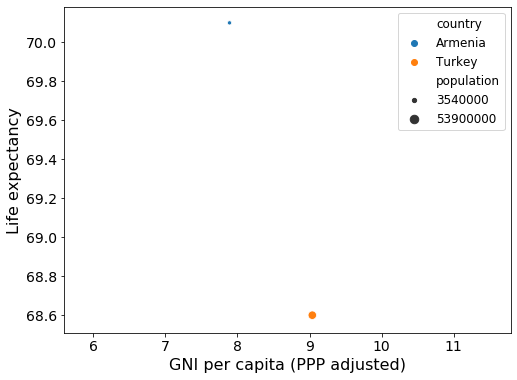

In [59]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='gni_per_capita', y='life_exp', size = 'population', hue='country', data=query, legend='full')
plt.xlim(dfs.gni_per_capita.min(), dfs.gni_per_capita.max())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel='GNI per capita (PPP adjusted)',fontsize=16)
plt.ylabel(ylabel='Life expectancy',fontsize=16)
plt.legend(prop={'size':12})
plt.show()

In [61]:
countries = list(np.unique(dfs.country))
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'Ind